# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#building query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f'{url}&appid={api_key}&units={units}&q='

In [4]:
#creating lists with city weather data
temperature = []
humidity = []
cloudiness = []
wind_speed = []
city_list = []
lat_list = []
lng_list = []
count = 0

for city in cities:
    
    count += 1
    print(f'City number: {count}. City name: {city}')
    
    try:
        response = requests.get(query_url + city).json()
        temperature.append((response['main']['temp']))
        humidity.append((response['main']['humidity']))
        cloudiness.append((response['clouds']['all']))
        wind_speed.append((response['wind']['speed']))
        lat_list.append((response['coord']['lat']))
        lng_list.append((response['coord']['lon']))
        city_list.append(city)
        
    except:
        print('You have an error.')

City number: 1. City name: mar del plata
City number: 2. City name: bluff
City number: 3. City name: albany
City number: 4. City name: provideniya
City number: 5. City name: ilhabela
City number: 6. City name: lata
City number: 7. City name: arraial do cabo
City number: 8. City name: rikitea
City number: 9. City name: taburao
You have an error.
City number: 10. City name: mataura
City number: 11. City name: port alfred
City number: 12. City name: broome
City number: 13. City name: tarauaca
City number: 14. City name: uray
City number: 15. City name: rudnichnyy
City number: 16. City name: talcahuano
City number: 17. City name: tuktoyaktuk
City number: 18. City name: busselton
City number: 19. City name: normandin
City number: 20. City name: san lorenzo
City number: 21. City name: taolanaro
You have an error.
City number: 22. City name: hermanus
City number: 23. City name: umea
City number: 24. City name: bathsheba
City number: 25. City name: nikolskoye
City number: 26. City name: cayenn

City number: 209. City name: barrow
City number: 210. City name: nyrob
City number: 211. City name: sur
City number: 212. City name: saquena
City number: 213. City name: martil
City number: 214. City name: namibe
City number: 215. City name: mananjary
City number: 216. City name: mandalgovi
City number: 217. City name: shillong
City number: 218. City name: longyearbyen
City number: 219. City name: banda aceh
City number: 220. City name: san rafael
City number: 221. City name: karratha
City number: 222. City name: padang
City number: 223. City name: sebinkarahisar
City number: 224. City name: arlit
City number: 225. City name: lolua
You have an error.
City number: 226. City name: ostrovnoy
City number: 227. City name: tarakan
City number: 228. City name: tsihombe
You have an error.
City number: 229. City name: talaya
City number: 230. City name: gayeri
City number: 231. City name: kikwit
City number: 232. City name: vestmanna
City number: 233. City name: esperance
City number: 234. City

City number: 418. City name: mentok
You have an error.
City number: 419. City name: almaznyy
City number: 420. City name: sinkat
You have an error.
City number: 421. City name: greymouth
City number: 422. City name: santa cruz
City number: 423. City name: torrington
City number: 424. City name: inirida
City number: 425. City name: westerland
City number: 426. City name: marcona
You have an error.
City number: 427. City name: vondrozo
City number: 428. City name: mehamn
City number: 429. City name: chipata
City number: 430. City name: tarnos
City number: 431. City name: belmonte
City number: 432. City name: pestretsy
City number: 433. City name: shubarkuduk
City number: 434. City name: bac lieu
City number: 435. City name: hithadhoo
City number: 436. City name: chunskiy
City number: 437. City name: sechura
City number: 438. City name: birjand
City number: 439. City name: sumbe
City number: 440. City name: dianopolis
You have an error.
City number: 441. City name: maldonado
City number: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#create df from city weather query results
weather_dict = {"City": city_list,
               "Temperature": temperature,
               "%Humidity": humidity,
               "Cloudiness":cloudiness,
               "Wind Speed": wind_speed,
               "Latitude": lat_list,
               "Longitude": lng_list}

weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Temperature,%Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,mar del plata,11.10,60,100,1.79,-38.0023,-57.5575
1,bluff,8.78,89,100,4.79,-46.6000,168.3333
2,albany,23.09,57,99,0.32,42.6001,-73.9662
3,provideniya,7.38,78,100,2.78,64.3833,-173.3000
4,ilhabela,23.12,70,9,1.58,-23.7781,-45.3581
...,...,...,...,...,...,...,...
565,oxapampa,19.94,69,12,1.62,-10.5775,-75.4017
566,batagay,18.51,64,67,0.57,67.6333,134.6333
567,gokak,24.41,68,100,1.82,16.1667,74.8333
568,zastron,13.25,59,99,2.08,-30.3023,27.0840


In [6]:
#export city data to csv
weather_data.to_csv('weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#there are no cities in this df with humidity > 100%
weather_data.loc[weather_data['%Humidity'] > 100]

,City,Temperature,%Humidity,Cloudiness,Wind Speed,Latitude,Longitude


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [13]:
weather_data.head()

,City,Temperature,%Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,mar del plata,11.10,60,100,1.79,-38.0023,-57.5575
1,bluff,8.78,89,100,4.79,-46.6000,168.3333
2,albany,23.09,57,99,0.32,42.6001,-73.9662
3,provideniya,7.38,78,100,2.78,64.3833,-173.3000
4,ilhabela,23.12,70,9,1.58,-23.7781,-45.3581


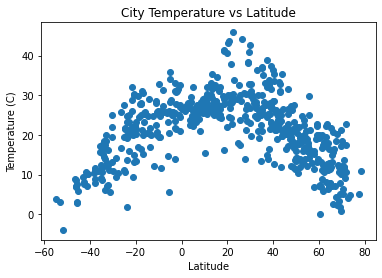

In [22]:
plt.scatter(weather_data['Latitude'], weather_data['Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('City Temperature vs Latitude')

plt.show()

Explanation

## Latitude vs. Humidity Plot

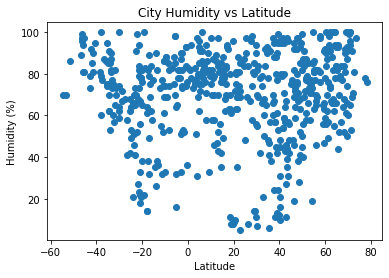

In [26]:
plt.scatter(weather_data['Latitude'], weather_data['%Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Humidity vs Latitude')

plt.show()

Explanation

## Latitude vs. Cloudiness Plot

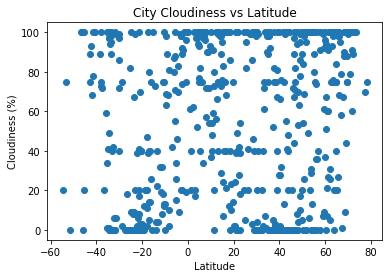

In [25]:
plt.scatter(weather_data['Latitude'], weather_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Cloudiness vs Latitude')

plt.show()

Explanation

## Latitude vs. Wind Speed Plot

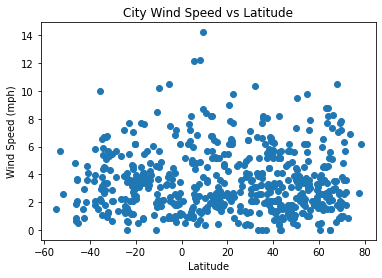

In [27]:
plt.scatter(weather_data['Latitude'], weather_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Wind Speed vs Latitude')

plt.show()

Explanation

## Linear Regression

In [30]:
#Creating dataframes for each hemisphere
north_data = weather_data.loc[weather_data['Latitude'] > 0]
south_data = weather_data.loc[weather_data['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

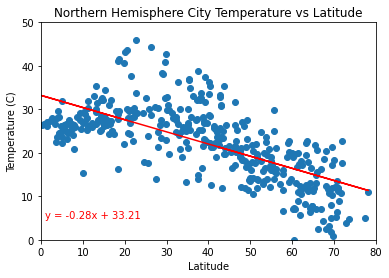

 rsquared = 0.46


In [81]:
plt.scatter(north_data['Latitude'], north_data['Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('Northern Hemisphere City Temperature vs Latitude')


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_data['Latitude'], north_data['Temperature'])
regress_values = north_data['Latitude'] * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept, 2)}'

plt.plot(north_data['Latitude'], regress_values, color='red')
plt.annotate(line_eq,(1,5), color='red', fontsize=10)

plt.xlim(0, 80)
plt.ylim(0, 50)

plt.show()
print(f' rsquared = {round(rvalue * rvalue,2)}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

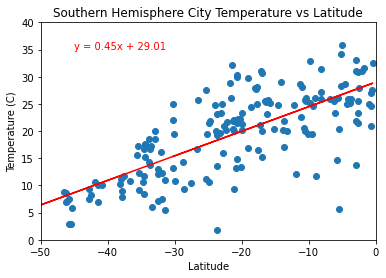

 rsquared = 0.56


In [82]:
plt.scatter(south_data['Latitude'], south_data['Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('Southern Hemisphere City Temperature vs Latitude')


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_data['Latitude'], south_data['Temperature'])
regress_values = south_data['Latitude'] * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept, 2)}'

plt.plot(south_data['Latitude'], regress_values, color='red')
plt.annotate(line_eq,(-45,35), color='red', fontsize=10)

plt.xlim(-50, 0)
plt.ylim(0, 40)

plt.show()
print(f' rsquared = {round(rvalue * rvalue,2)}')

Explanation -

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

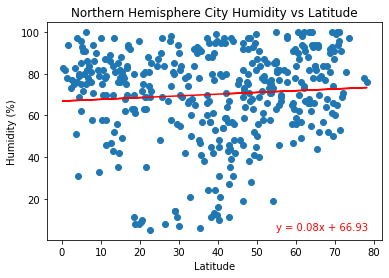

 rsquared = 0.01


In [83]:
plt.scatter(north_data['Latitude'], north_data['%Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere City Humidity vs Latitude')


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_data['Latitude'], north_data['%Humidity'])
regress_values = north_data['Latitude'] * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept, 2)}'

plt.plot(north_data['Latitude'], regress_values, color='red')
plt.annotate(line_eq,(55,5), color='red', fontsize=10)

plt.show()
print(f' rsquared = {round(rvalue * rvalue,2)}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

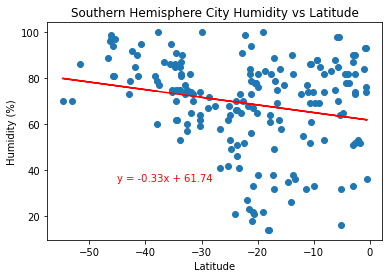

 rsquared = 0.05


In [85]:
plt.scatter(south_data['Latitude'], south_data['%Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere City Humidity vs Latitude')


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_data['Latitude'], south_data['%Humidity'])
regress_values = south_data['Latitude'] * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept, 2)}'

plt.plot(south_data['Latitude'], regress_values, color='red')
plt.annotate(line_eq,(-45,35), color='red', fontsize=10)

plt.show()
print(f' rsquared = {round(rvalue * rvalue,2)}')

In [ ]:
Explanation - 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

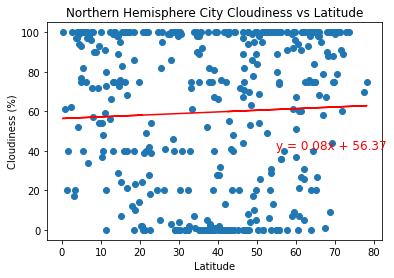

 rsquared = 0.0


In [91]:
plt.scatter(north_data['Latitude'], north_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere City Cloudiness vs Latitude')


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_data['Latitude'], north_data['Cloudiness'])
regress_values = north_data['Latitude'] * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept, 2)}'

plt.plot(north_data['Latitude'], regress_values, color='red')
plt.annotate(line_eq,(55,41), color='red', fontsize=12)

plt.show()
print(f' rsquared = {round(rvalue * rvalue,2)}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

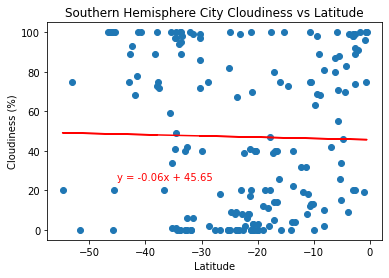

 rsquared = 0.0


In [94]:
plt.scatter(south_data['Latitude'], south_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere City Cloudiness vs Latitude')


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_data['Latitude'], south_data['Cloudiness'])
regress_values = south_data['Latitude'] * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept, 2)}'

plt.plot(south_data['Latitude'], regress_values, color='red')
plt.annotate(line_eq,(-45,25
                     ), color='red', fontsize=10)

plt.show()
print(f' rsquared = {round(rvalue * rvalue,2)}')

In [ ]:
Explanation

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

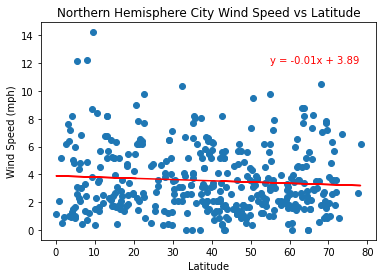

 rsquared = 0.01


In [97]:
plt.scatter(north_data['Latitude'], north_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere City Wind Speed vs Latitude')


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_data['Latitude'], north_data['Wind Speed'])
regress_values = north_data['Latitude'] * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept, 2)}'

plt.plot(north_data['Latitude'], regress_values, color='red')
plt.annotate(line_eq,(55,12), color='red', fontsize=10)

plt.show()
print(f' rsquared = {round(rvalue * rvalue,2)}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

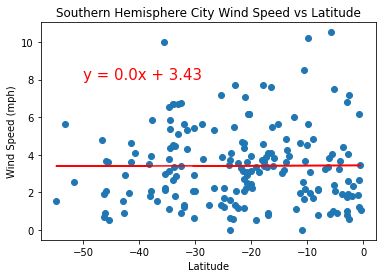

 rsquared = 0.0


In [104]:
plt.scatter(south_data['Latitude'], south_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere City Wind Speed vs Latitude')


(slope, intercept, rvalue, pvalue, stderr) = linregress(south_data['Latitude'], south_data['Wind Speed'])
regress_values = south_data['Latitude'] * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept, 2)}'

plt.plot(south_data['Latitude'], regress_values, color='red')
plt.annotate(line_eq,(-50,8), color='red', fontsize=15)

plt.show()
print(f' rsquared = {round(rvalue * rvalue,2)}')

In [ ]:
Explanation